In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load the files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Get number of observations for test and train
print([len(x) for x in [train_df, test_df]])

[891, 418]


In [8]:
# Combine it into one large file for data exploration and cleaning
combined_df = pd.concat([train_df, test_df])

# EDA

In [10]:
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

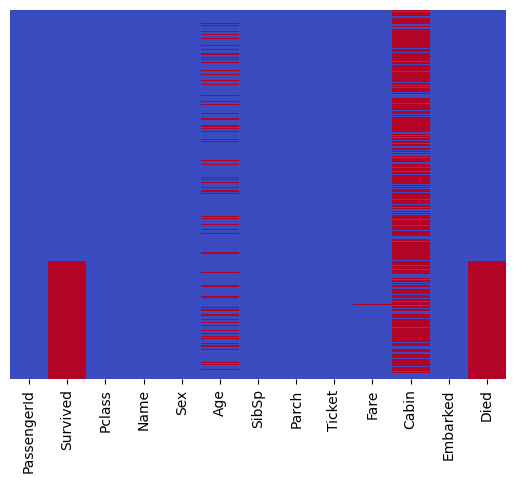

In [15]:
sns.heatmap(combined_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [12]:
# new feature
combined_df['Died'] = 1 - combined_df['Survived']

<Axes: xlabel='Sex'>

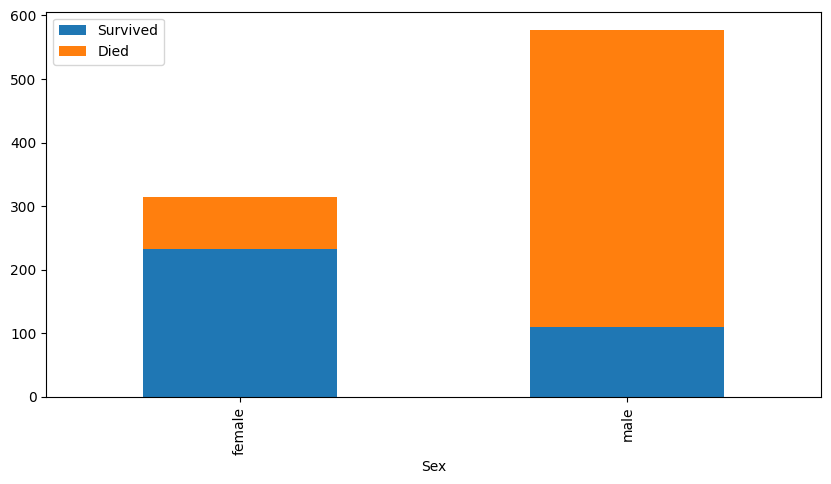

In [13]:
# Does age determine survivor? female has a higher probability of survival

combined_df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), stacked=True)

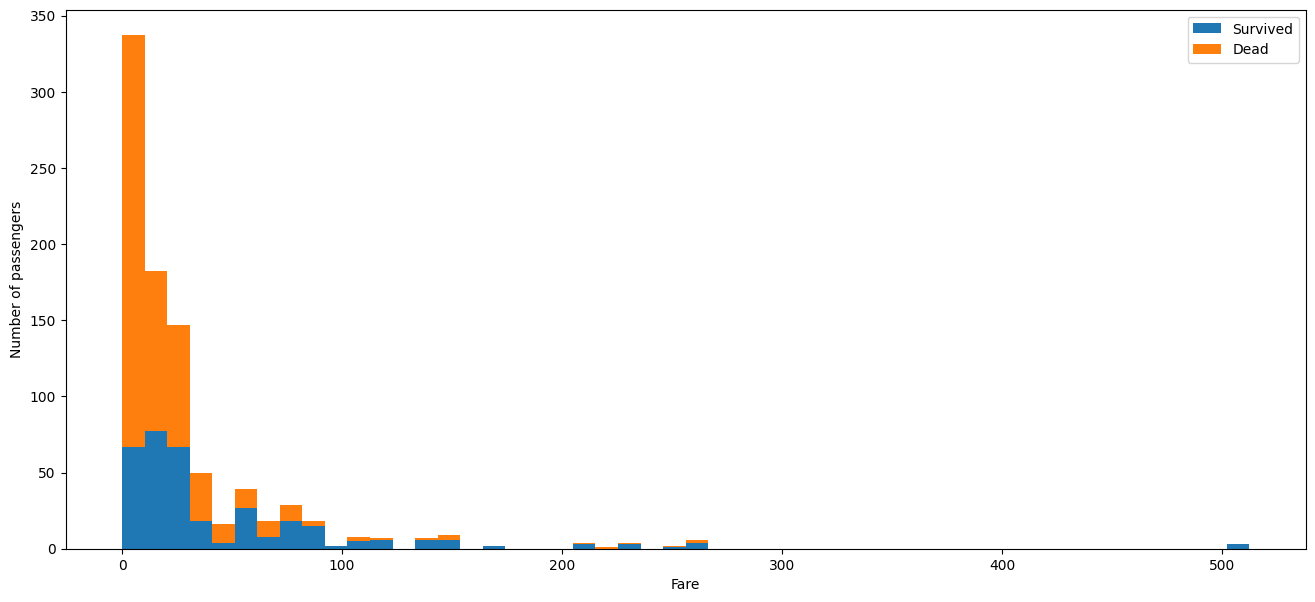

In [14]:
# Does fare determine survivor? >$50 have a higher probability of survival

figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Fare'], combined_df[combined_df['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

<Axes: xlabel='Pclass'>

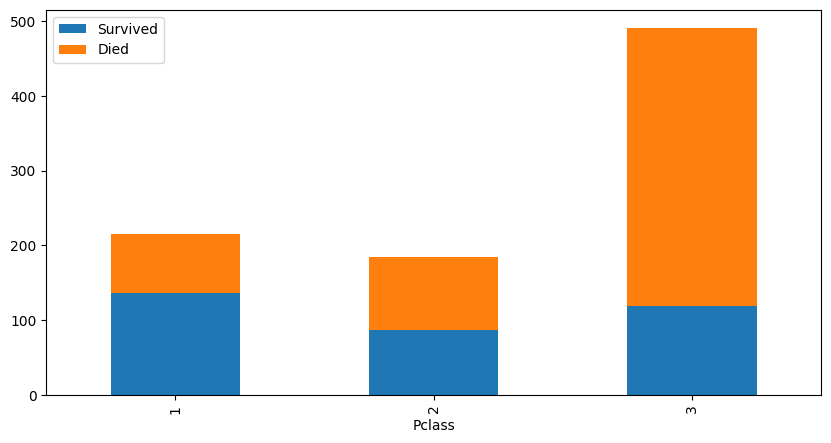

In [17]:
# Does class determine survivor? Class 3 more likely to die

combined_df.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), stacked=True)

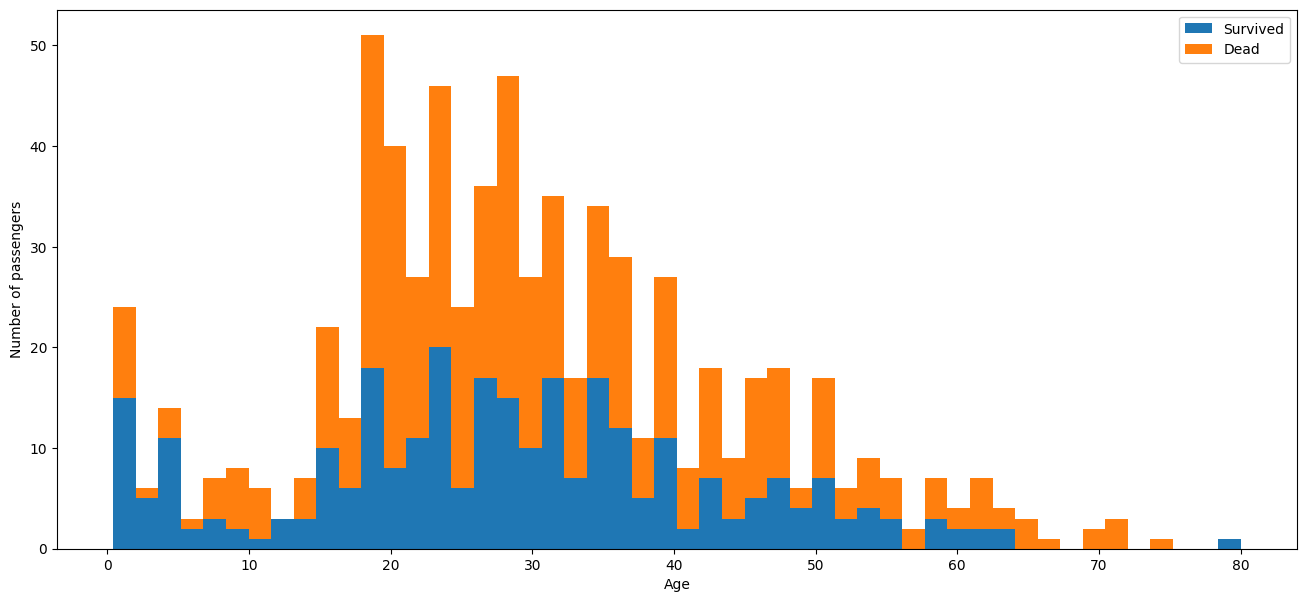

In [16]:
# Does age determine survivor? Younger kids has high chance of survivor
figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Age'], combined_df[combined_df['Survived'] == 0]['Age']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()